## Multinomial logistic regression, using this for comparing our good model

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

### load data

In [2]:
start_time = time.time()
# Load the data
train_data=pd.read_csv("train.tsv",delimiter="\t", header=None)
test_data=pd.read_csv("test.tsv",delimiter="\t", header=None, encoding='latin1')

In [3]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,1
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,1
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,1


In [4]:
#extract columns we need and rename accordingly
train_data = train_data.rename(columns={train_data.columns[14]: "label", train_data.columns[2]: "text"})
train_data=train_data[['text', 'label']]
train_data.head()

,text,label
0,Says the Annies List political group supports ...,0
1,When did the decline of coal start? It started...,1
2,"Hillary Clinton agrees with John McCain ""by vo...",1
3,Health care reform legislation is likely to ma...,0
4,The economic turnaround started at the end of ...,1


In [5]:
train_data['label'].value_counts()

label
1    5772
0    4497
Name: count, dtype: int64

In [6]:
test_data = test_data.rename(columns={test_data.columns[14]: "label", test_data.columns[2]: "text"})
test_data=test_data[['text', 'label']]
test_data.head()

,text,label
0,Building a wall on the U.S.-Mexico border will...,1
1,Wisconsin is on pace to double the number of l...,0
2,Says John McCain has done nothing to help the ...,0
3,Suzanne Bonamici supports a plan that will cut...,1
4,When asked by a reporter whether hes at the ce...,0


In [7]:
test_data['label'].value_counts()

label
1    727
0    556
Name: count, dtype: int64

### Converting to bag of words

In [9]:
X_train = train_data["text"]
y_train = train_data["label"]
X_test = test_data["text"]
y_test = test_data["label"]


vectorizer = CountVectorizer(stop_words="english", max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train)  # Fit on training data
X_test_bow = vectorizer.transform(X_test)   

### Logistic regression model

In [10]:
# train
model=LogisticRegression()
model.fit(X_train_bow, y_train)

LogisticRegression()

In [11]:
# testing
y_pred = model.predict(X_test_bow)

In [12]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6017147310989868

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.47      0.51       556
           1       0.64      0.70      0.67       727

    accuracy                           0.60      1283
   macro avg       0.59      0.59      0.59      1283
weighted avg       0.60      0.60      0.60      1283



[[264 292]
 [219 508]]


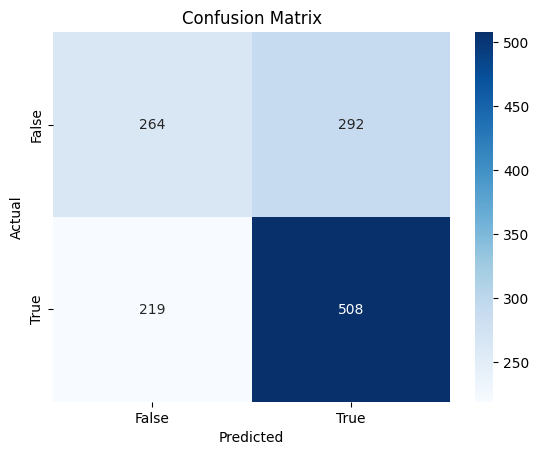

Elapsed time: 0.6044580936431885 seconds


In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# End the timer
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")
